In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



In [40]:
df = pd.read_csv('dataset_mood_smartphone.csv')  # replace with the actual dataset path
df.head(100)

,Unnamed: 0,id,time,variable,value
0,1,AS14.01,2014-02-26 13:00:00.000,mood,6.0
1,2,AS14.01,2014-02-26 15:00:00.000,mood,6.0
2,3,AS14.01,2014-02-26 18:00:00.000,mood,6.0
3,4,AS14.01,2014-02-26 21:00:00.000,mood,7.0
4,5,AS14.01,2014-02-27 09:00:00.000,mood,6.0
...,...,...,...,...,...
95,96,AS14.01,2014-04-08 18:00:00.000,mood,7.0
96,97,AS14.01,2014-04-08 20:00:00.000,mood,5.0
97,98,AS14.01,2014-04-09 09:00:00.000,mood,7.0
98,99,AS14.01,2014-04-09 12:00:00.000,mood,8.0


In [41]:
# Count how many rows have ID == 'AS14.01'
df[df['id'] == 'AS14.01'].shape[0]

21999

In [42]:
# Get counts of all unique IDs
df['id'].value_counts()

id
AS14.01    21999
AS14.23    21852
AS14.13    19592
AS14.28    19276
AS14.06    18092
AS14.29    17499
AS14.12    17311
AS14.30    17279
AS14.26    16403
AS14.33    16390
AS14.07    16045
AS14.17    15826
AS14.05    15745
AS14.02    14581
AS14.27    14575
AS14.24    14430
AS14.03    14425
AS14.25    12589
AS14.31    11889
AS14.19    11397
AS14.32    11193
AS14.09    10886
AS14.14     9286
AS14.08     7902
AS14.16     3982
AS14.20     3620
AS14.15     2848
Name: count, dtype: int64

In [43]:
# Get counts of all unique IDs
df['variable'].value_counts()

variable
screen                  96578
appCat.builtin          91288
appCat.communication    74276
appCat.entertainment    27125
activity                22965
appCat.social           19145
appCat.other             7650
circumplex.valence       5643
circumplex.arousal       5643
appCat.office            5642
mood                     5641
call                     5239
appCat.travel            2846
appCat.utilities         2487
sms                      1798
appCat.finance            939
appCat.unknown            939
appCat.game               813
appCat.weather            255
Name: count, dtype: int64

In [44]:

df.isnull().sum()

Unnamed: 0      0
id              0
time            0
variable        0
value         202
dtype: int64

<Axes: xlabel='value', ylabel='Count'>

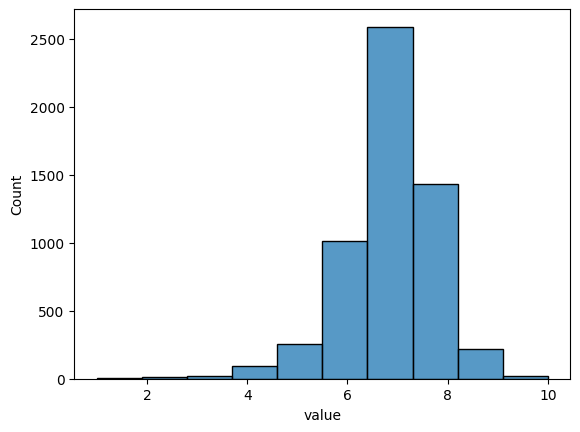

In [45]:
#Mood Distrubution
sns.histplot(df[df['variable'] == 'mood']['value'].astype(float), bins=10)

<Axes: xlabel='variable', ylabel='value'>

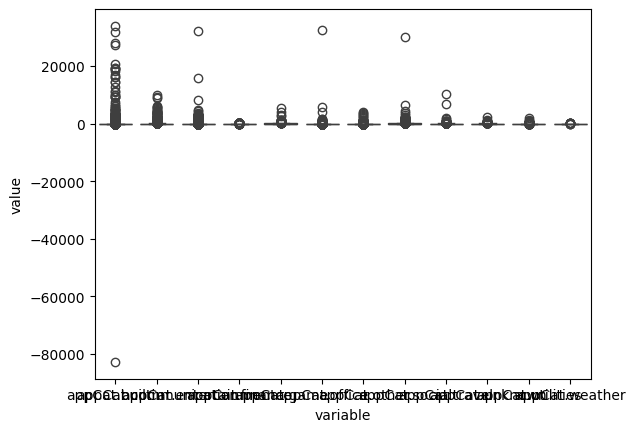

In [46]:
sns.boxplot(data=df[df['variable'].str.contains("appCat")], x='variable', y='value')



/var/folders/7f/7cdbnckj5j1b01ydyh6jjfbh0000gn/T/ipykernel_67821/2331008595.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  screen_df['time'] = pd.to_datetime(screen_df['time'])


<Axes: xlabel='time'>

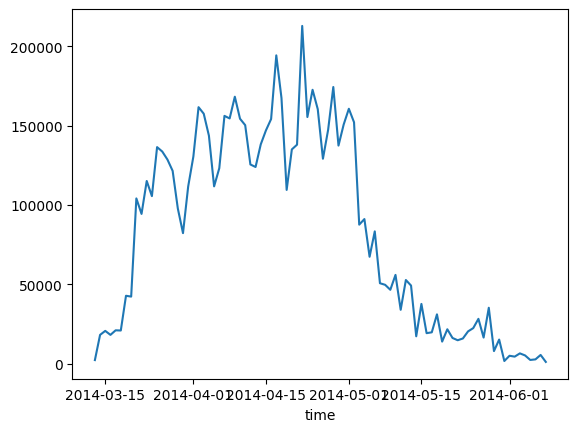

In [47]:
screen_df = df[df['variable'] == 'screen']
screen_df['time'] = pd.to_datetime(screen_df['time'])
screen_df.groupby(screen_df['time'].dt.date)['value'].sum().plot()

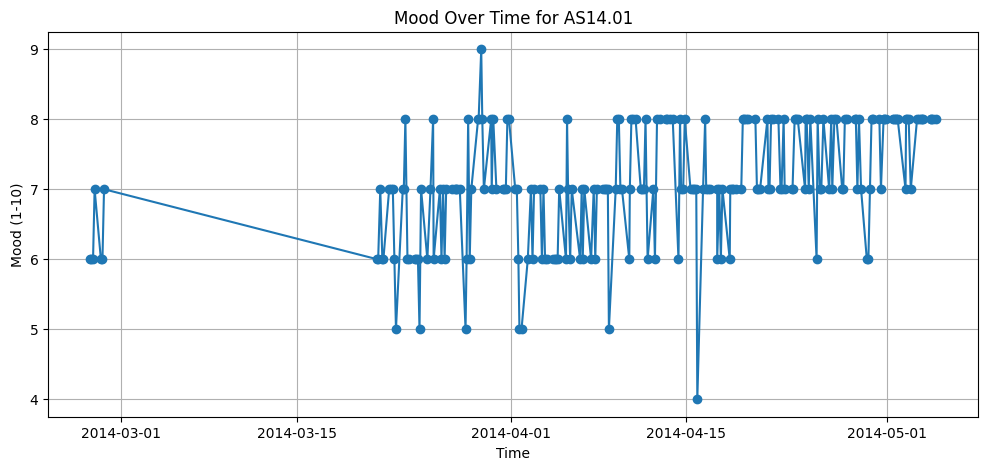

In [49]:

# Filter for the specific user and mood entries
user_id = 'AS14.01'
mood_df = df[(df['id'] == user_id) & (df['variable'] == 'mood')].copy()

# Convert timestamp to datetime and sort chronologically
mood_df['time'] = pd.to_datetime(mood_df['time'])
mood_df = mood_df.sort_values('time')

# Convert mood values to float
mood_df['value'] = mood_df['value'].astype(float)

# Plot
plt.figure(figsize=(12, 5))
plt.plot(mood_df['time'], mood_df['value'], marker='o', linestyle='-')
plt.title(f'Mood Over Time for {user_id}')
plt.xlabel('Time')
plt.ylabel('Mood (1-10)')
plt.grid(True)
plt.show()

<Figure size 640x480 with 0 Axes>

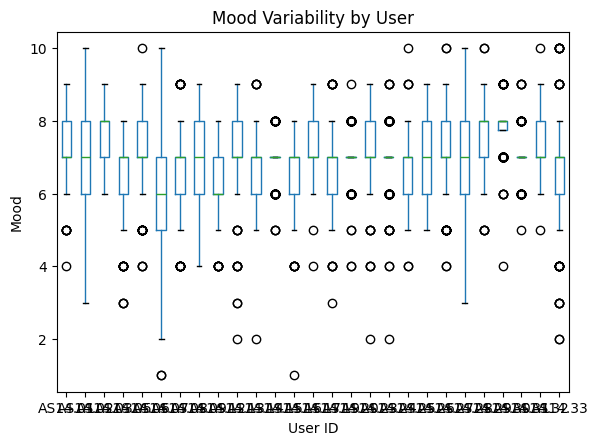

In [65]:
import matplotlib.pyplot as plt

# 1. Filter to mood only
df_mood = df[df['variable'] == 'mood']

# 2. Create a box plot grouped by 'id'
plt.figure()
df_mood.boxplot(column='value', by='id', grid=False)
plt.xlabel('User ID')
plt.ylabel('Mood')
plt.title('Mood Variability by User')
plt.suptitle('')  # remove the automatic Pandas title
plt.show()

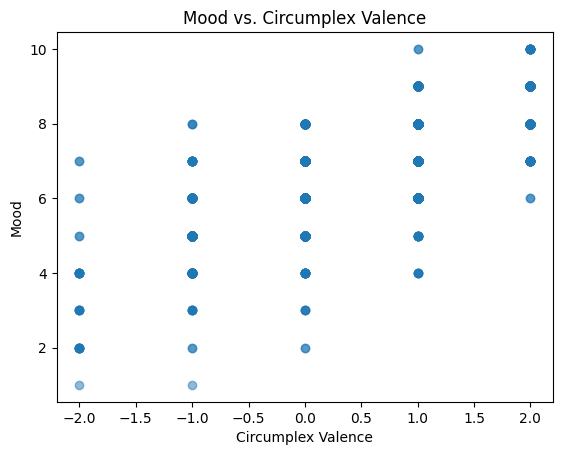

In [66]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Separate rows for mood and valence
df_mood = df[df['variable'] == 'mood'].copy()
df_mood.rename(columns={'value': 'mood_value'}, inplace=True)

df_val = df[df['variable'] == 'circumplex.valence'].copy()
df_val.rename(columns={'value': 'valence_value'}, inplace=True)

# 2. Merge on id and time
merged_mv = pd.merge(df_mood[['id','time','mood_value']],
                     df_val[['id','time','valence_value']],
                     on=['id','time'], how='inner')

# 3. Scatter plot
plt.figure()
plt.scatter(merged_mv['valence_value'], merged_mv['mood_value'], alpha=0.5)
plt.xlabel('Circumplex Valence')
plt.ylabel('Mood')
plt.title('Mood vs. Circumplex Valence')
plt.show()

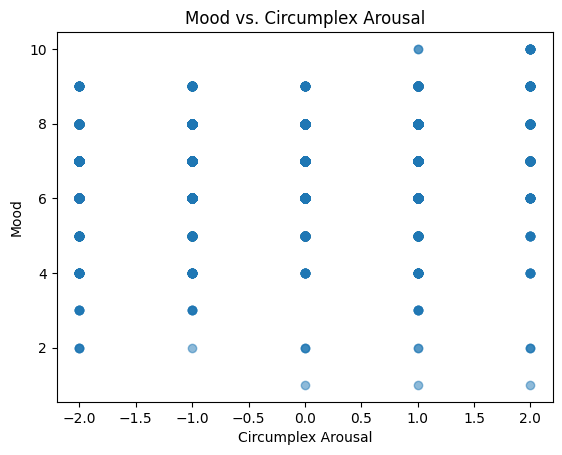

In [67]:
import pandas as pd
import matplotlib.pyplot as plt

df_mood = df[df['variable'] == 'mood'].copy()
df_mood.rename(columns={'value': 'mood_value'}, inplace=True)

df_arousal = df[df['variable'] == 'circumplex.arousal'].copy()
df_arousal.rename(columns={'value': 'arousal_value'}, inplace=True)

merged_ma = pd.merge(df_mood[['id','time','mood_value']],
                     df_arousal[['id','time','arousal_value']],
                     on=['id','time'], how='inner')

plt.figure()
plt.scatter(merged_ma['arousal_value'], merged_ma['mood_value'], alpha=0.5)
plt.xlabel('Circumplex Arousal')
plt.ylabel('Mood')
plt.title('Mood vs. Circumplex Arousal')
plt.show()

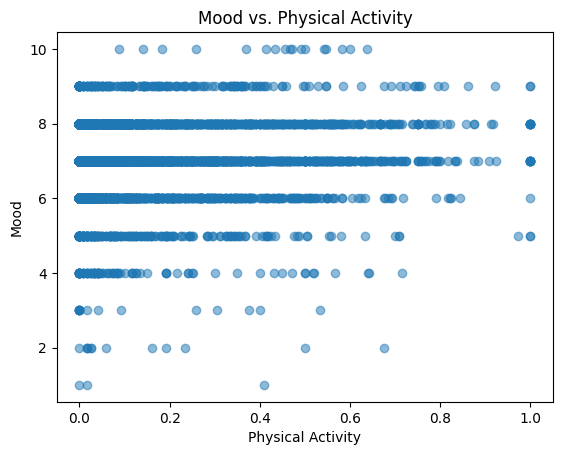

In [68]:
df_mood = df[df['variable'] == 'mood'].copy()
df_mood.rename(columns={'value':'mood_value'}, inplace=True)

df_act = df[df['variable'] == 'activity'].copy()
df_act.rename(columns={'value':'act_value'}, inplace=True)

merged_ma = pd.merge(df_mood[['id','time','mood_value']],
                     df_act[['id','time','act_value']],
                     on=['id','time'], how='inner')

plt.figure()
plt.scatter(merged_ma['act_value'], merged_ma['mood_value'], alpha=0.5)
plt.xlabel('Physical Activity')
plt.ylabel('Mood')
plt.title('Mood vs. Physical Activity')
plt.show()

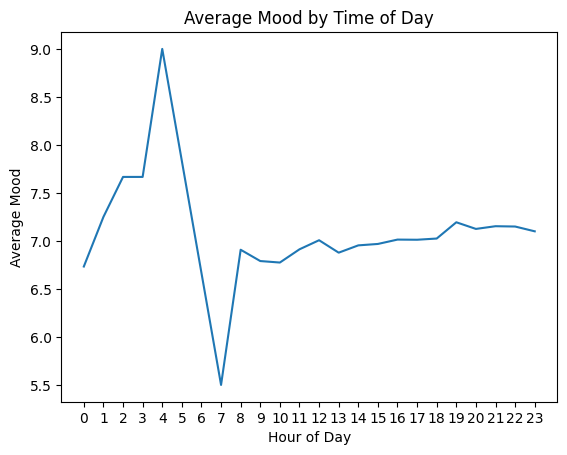

In [69]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Filter the DataFrame to mood-only rows
df_mood = df[df['variable'] == 'mood'].copy()

# 2. Convert time to datetime
df_mood['time'] = pd.to_datetime(df_mood['time'], errors='coerce')

# 3. Extract the hour (0–23)
df_mood['hour'] = df_mood['time'].dt.hour

# 4. Compute both mean and count of mood values per hour
grouped = df_mood.groupby('hour')['value']
avg_mood_by_hour = grouped.mean()
count_by_hour = grouped.count()

# 5. Plot the mean mood by hour (line chart)
plt.figure()
ax = avg_mood_by_hour.plot(kind='line', marker='o')  # 'o' marker makes it easy to see points
plt.xlabel('Hour of Day')
plt.ylabel('Average Mood')
plt.title('Average Mood by Time of Day')
plt.xticks(range(24))  # Show 0..23

# 6. Annotate each point with the count of entries
for hour, mean_val in avg_mood_by_hour.items():
    n = count_by_hour[hour]
    ax.annotate(
        f'n={n}',
        xy=(hour, mean_val),            # position to annotate
        xytext=(0, 5),                  # offset in pixels above/below the point
        textcoords='offset points',
        ha='center', va='bottom'
    )

plt.show()

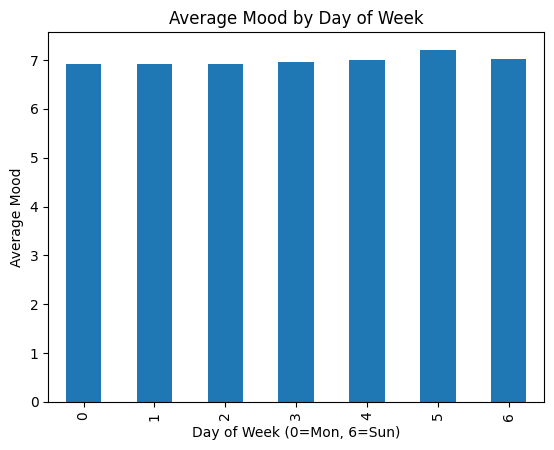

In [70]:
df_mood = df[df['variable'] == 'mood'].copy()
df_mood['time'] = pd.to_datetime(df_mood['time'], errors='coerce')

# Extract day of week
df_mood['day_of_week'] = df_mood['time'].dt.dayofweek

avg_mood_by_dow = df_mood.groupby('day_of_week')['value'].mean()

plt.figure()
avg_mood_by_dow.plot(kind='bar')
plt.xlabel('Day of Week (0=Mon, 6=Sun)')
plt.ylabel('Average Mood')
plt.title('Average Mood by Day of Week')
plt.show()

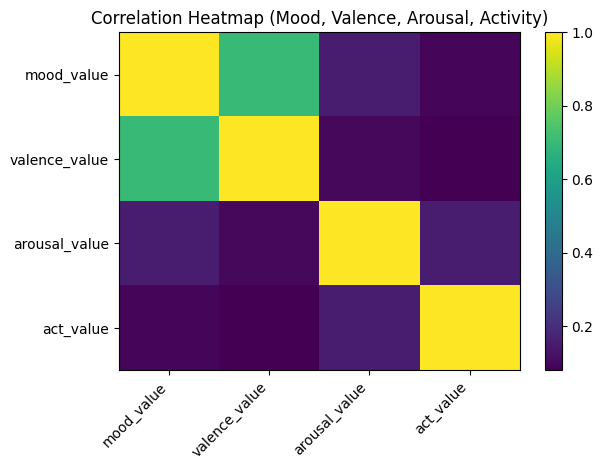

In [71]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Separate dataframes by variable
df_mood = df[df['variable'] == 'mood'].copy()
df_mood.rename(columns={'value': 'mood_value'}, inplace=True)

df_val = df[df['variable'] == 'circumplex.valence'].copy()
df_val.rename(columns={'value': 'valence_value'}, inplace=True)

df_arousal = df[df['variable'] == 'circumplex.arousal'].copy()
df_arousal.rename(columns={'value': 'arousal_value'}, inplace=True)

df_act = df[df['variable'] == 'activity'].copy()
df_act.rename(columns={'value': 'act_value'}, inplace=True)

# 2. Merge them successively on (id, time)
merged_all = pd.merge(df_mood[['id','time','mood_value']],
                      df_val[['id','time','valence_value']],
                      on=['id','time'],
                      how='inner')

merged_all = pd.merge(merged_all,
                      df_arousal[['id','time','arousal_value']],
                      on=['id','time'],
                      how='inner')

merged_all = pd.merge(merged_all,
                      df_act[['id','time','act_value']],
                      on=['id','time'],
                      how='inner')

# 3. Now merged_all has: id, time, mood_value, valence_value, arousal_value, act_value
#    We can compute a correlation matrix on just the numeric columns
numeric_cols = ['mood_value','valence_value','arousal_value','act_value']
corr_matrix = merged_all[numeric_cols].corr()

# 4. Plot a heatmap with Matplotlib
plt.figure()
plt.imshow(corr_matrix, interpolation='nearest', aspect='auto')
plt.colorbar()
plt.xticks(range(len(numeric_cols)), numeric_cols, rotation=45, ha='right')
plt.yticks(range(len(numeric_cols)), numeric_cols)
plt.title('Correlation Heatmap (Mood, Valence, Arousal, Activity)')
plt.tight_layout()
plt.show()